<h1>Advanced Optimization methods</h1>

<ul>
  <li>No need for learning rate hyper-parameter (α).</li>
  <li>Usually converge much faster than gradient descent.</li>
</ul> 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize  # for optimization


<h3>Cost function</h3>

In [2]:
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

<h4>Plot cost function</h4>

In [3]:
t0 = np.linspace(0, 10, 100)
t1 = np.linspace(0, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

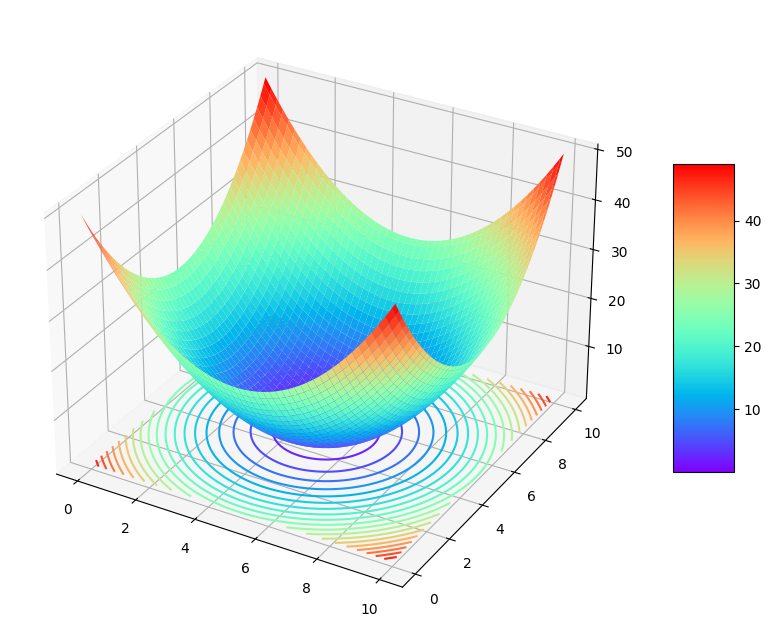

In [4]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

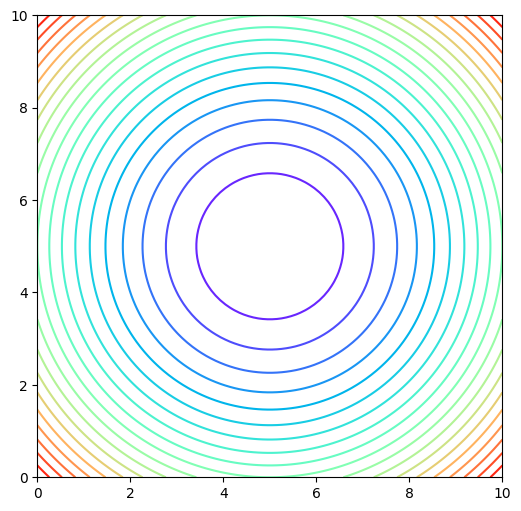

In [5]:
plt.figure(figsize=(6, 6))
cset = plt.contour(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

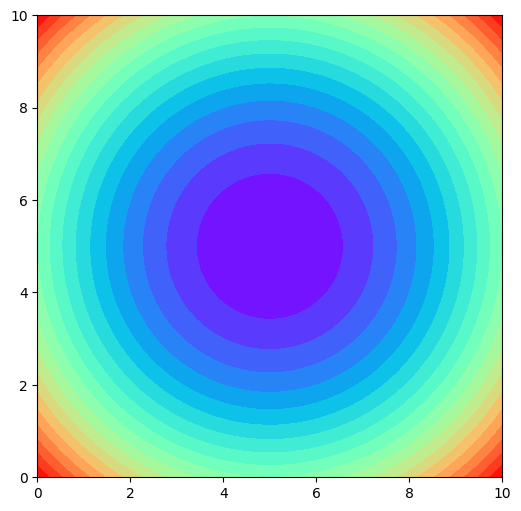

In [6]:
plt.figure(figsize=(6, 6))
cset = plt.contourf(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<h1>Using <code>scipy.optimize.minimize</code></h1>

<p>After defining the cost function, we can use the minimize function from scipy.optimize to minimize the cost function.

To use the <code>minimize</code> function, we need to provide the following three arguments:</p>
<ol>
  <li>The first argument is the cost function itself.</li>
  <li>The second argument is our initial guess.</li>
  <li>The optimization method (<code>CG</code>, <code>BFGS</code>, ...)</li>
</ol> 


In [7]:
minimize(J, x0=[0, 0], method='CG')

     fun: 2.4774723757749714e-18
     jac: array([1.71271317e-08, 1.71271317e-08])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

<strong>Another initial guess:</strong>

In [8]:
minimize(J, x0=[10, -3], method='CG')

     fun: 2.730455135196181e-16
     jac: array([ 1.12131602e-08, -1.79405912e-08])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5.        , 4.99999998])

<strong>Random initial guess:</strong>

In [9]:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 9.366419207638767e-17
     jac: array([1.15840848e-09, 1.27055166e-09])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([4.99999999, 4.99999999])

<strong>Saving the outputs of the <code>minimize</code> function:</strong>

In [10]:
result = minimize(J, x0=np.random.randn(2), method='CG')

In [11]:
result.success

True

In [12]:
result.x  # solution

array([4.99999999, 4.99999999])

In [13]:
result.fun  # the minimum value of the cost function

2.3018649285507116e-16

<strong>Using other optimization methods:</strong>

In [14]:
minimize(J, x0=[0, 0], method='BFGS')

      fun: 3.553879697441953e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592194e-08, -1.17592212e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.99999999, 4.99999999])

Getting help:

In [15]:
# ??minimize

<h2>Providing gradient information</h2>

In [16]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [17]:
gradients([5, 5])

array([0, 0])

In [18]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 2.5049621553985728e-17
     jac: array([-6.57642829e-09, -7.54646123e-09])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5., 5.])